In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [7]:
df = pd.read_csv('CADdataset.csv') #menampilkan data 
df

,Age,Weight,Height,Sex,BMI,DM,HTN,Current Smoker,Obesity,DLP,...,LVH,PRP,FBS,ESR,EF,RWMA,EX-Smoker,CR,BUN,CAD
0,53,90,175,Male,29.387755,0,1,1,Y,Y,...,N,N,90,7,50,0,0,0.7,8,Cad
1,67,70,157,Fmale,28.398718,0,1,0,Y,N,...,N,N,80,26,40,4,0,1.0,30,Cad
2,54,54,164,Male,20.077335,0,0,1,N,N,...,N,N,85,10,40,2,0,1.0,17,Cad
3,66,67,158,Fmale,26.838648,0,1,0,Y,N,...,N,N,78,76,55,0,0,1.2,30,Normal
4,50,87,153,Fmale,37.165193,0,1,0,Y,N,...,N,N,104,27,50,0,0,1.0,16,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,58,84,168,Male,29.761905,0,0,0,Y,N,...,N,N,92,13,45,0,0,1.0,13,Cad
299,55,64,152,Fmale,27.700831,0,0,0,Y,N,...,N,N,86,3,40,0,0,0.9,23,Normal
300,48,77,160,Fmale,30.078125,0,1,0,Y,N,...,N,N,83,20,55,0,0,1.0,13,Normal
301,57,90,159,Fmale,35.599858,1,0,0,Y,N,...,N,N,96,31,55,0,0,1.0,14,Normal


# 1. Data Understanding

In [11]:
print("Data Shape : ", df.shape) #melihat baris dan kolom pada data tersebut

Data Shape :  (303, 27)


In [13]:
df.info () #melihat tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 303 non-null    int64  
 1   Weight              303 non-null    int64  
 2   Height              303 non-null    int64  
 3   Sex                 303 non-null    object 
 4   BMI                 303 non-null    float64
 5   DM                  303 non-null    int64  
 6   HTN                 303 non-null    int64  
 7   Current Smoker      303 non-null    int64  
 8   Obesity             303 non-null    object 
 9   DLP                 303 non-null    object 
 10  BP                  303 non-null    int64  
 11  WPE                 303 non-null    object 
 12  Typical Chest Pain  303 non-null    int64  
 13  Atypical            303 non-null    object 
 14  Nonanginal          303 non-null    object 
 15  St Depression       303 non-null    int64  
 16  Tinversi

In [14]:
df.CAD.value_counts() #melihat berapa banyak terdiagnosis CAD

Cad       216
Normal     87
Name: CAD, dtype: int64

# 2.Data Cleaning

In [15]:
df.duplicated().sum() #mencari nilai duplikasi dari data

0

In [16]:
df.isnull().sum() #mencari data yang yang belum terisi

Age                   0
Weight                0
Height                0
Sex                   0
BMI                   0
DM                    0
HTN                   0
Current Smoker        0
Obesity               0
DLP                   0
BP                    0
WPE                   0
Typical Chest Pain    0
Atypical              0
Nonanginal            0
St Depression         0
Tinversion            0
LVH                   0
PRP                   0
FBS                   0
ESR                   0
EF                    0
 RWMA                 0
EX-Smoker             0
CR                    0
BUN                   0
CAD                   0
dtype: int64

# 3. EDA

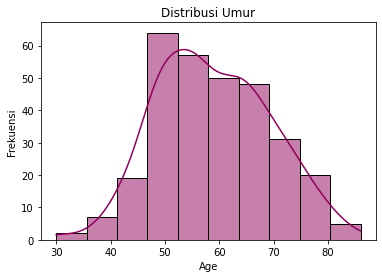

In [21]:
# visualisasi terhadap atribut umur

plt.figure(figsize=(6, 4)) #ukuran untuk visualisasi yang akan ditampilkan
sns.histplot(data=df, x='Age', bins=10, kde=True, color='#91005a') # menggunakan visualisai histogram plot

plt.title('Distribusi Umur') #judul visualisasi
plt.xlabel('Age')
plt.ylabel('Frekuensi')
plt.show()

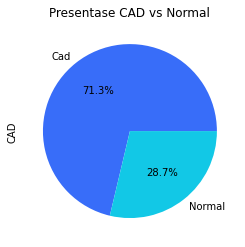

In [29]:
# menampilkan visualisasi dari hasil diagnosis berupa persen

sns.set_palette('rainbow') #memberikan warna
df['CAD'].value_counts().plot(kind='pie', autopct='%1.1f%%') #menggunakan visualisasi pie dari data tersebut
plt.title('Presentase CAD vs Normal') #judul visualisasi
plt.show()

diagnosis penyakit CAD lebih besar

In [30]:
# menamplikan nilai kolerasi

df.corr()

# semakin nilai kolerasi mendekati angka 1 atau mencapai angka 1 maka nilai kolerasi tersebut bernilai baik, 
# namun sebaliknya jika kolerasi mendekati angka -1 maka kolerasi/atribut tersebut bernilai tidak cukup baik 

,Age,Weight,Height,BMI,DM,HTN,Current Smoker,BP,Typical Chest Pain,St Depression,Tinversion,FBS,ESR,EF,RWMA,EX-Smoker,CR,BUN
Age,1.000000,-0.264585,-0.163753,-0.161414,0.072543,0.246690,-0.143879,0.215527,0.138387,0.177432,0.041913,0.015385,0.183127,-0.140512,0.108663,0.076608,0.227097,0.300663
Weight,-0.264585,1.000000,0.460631,0.725005,-0.003531,-0.028532,0.157385,-0.025930,-0.002986,-0.114619,-0.021033,0.012737,-0.139314,0.026789,-0.007648,0.068977,0.150226,-0.057670
Height,-0.163753,0.460631,1.000000,-0.269356,-0.052318,-0.153668,0.335248,-0.072511,0.023149,-0.150480,0.023690,-0.094789,-0.222182,-0.093295,0.095715,0.079034,0.162634,-0.071229
BMI,-0.161414,0.725005,-0.269356,1.000000,0.045360,0.091652,-0.089398,0.031916,-0.012911,-0.009146,-0.043311,0.089380,0.023259,0.093903,-0.079739,0.005016,0.034338,-0.011139
DM,0.072543,-0.003531,-0.052318,0.045360,1.000000,0.217864,-0.208458,0.128010,0.105623,0.015532,-0.058998,0.677940,0.190397,-0.052507,0.064891,-0.120087,0.028606,0.144394
HTN,0.246690,-0.028532,-0.153668,0.091652,0.217864,1.000000,-0.169000,0.570418,0.122788,0.016736,0.115040,0.109592,0.161704,0.031365,-0.000372,0.041045,0.158881,0.152895
Current Smoker,-0.143879,0.157385,0.335248,-0.089398,-0.208458,-0.169000,1.000000,-0.079115,0.079987,0.023762,0.200881,-0.101457,-0.121199,-0.068943,0.078479,-0.094652,-0.046339,-0.061596
BP,0.215527,-0.025930,-0.072511,0.031916,0.128010,0.570418,-0.079115,1.000000,0.114926,-0.032295,0.046643,0.145861,0.036155,-0.047472,0.024047,0.028781,0.077407,0.038045
Typical Chest Pain,0.138387,-0.002986,0.023149,-0.012911,0.105623,0.122788,0.079987,0.114926,1.000000,0.055837,0.120118,0.148110,0.073777,-0.103957,0.177166,0.058855,-0.055728,-0.031728
St Depression,0.177432,-0.114619,-0.150480,-0.009146,0.015532,0.016736,0.023762,-0.032295,0.055837,1.000000,0.322456,0.032800,0.078451,-0.015214,0.165025,-0.014970,0.011860,0.017257


Semakin nilai kolerasi mendekati angka 1 atau mencapai angka 1 maka nilai kolerasi tersebut bernilai baik, 
namun sebaliknya jika kolerasi mendekati angka -1 maka kolerasi/atribut tersebut bernilai tidak cukup baik 

<AxesSubplot:>

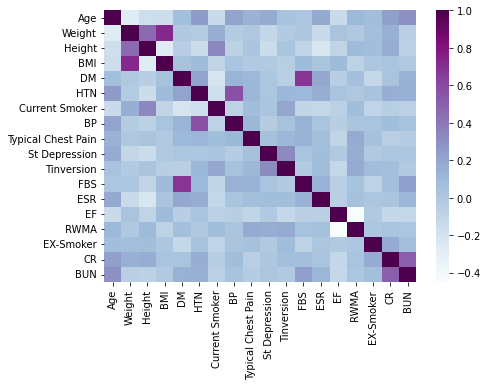

In [33]:
# visualisasi dari kolerasi

plt.figure(figsize=(7, 5)) #ukuran visualisasi
sns.heatmap(df.corr(), cmap='BuPu') #menambahkan parameter dan warna visualisasi

# semakin warnanya gelap maka kolersi bernilai baik, dan sebaliknya

Semakin warnanya gelap maka kolersi bernilai baik, dan sebaliknya

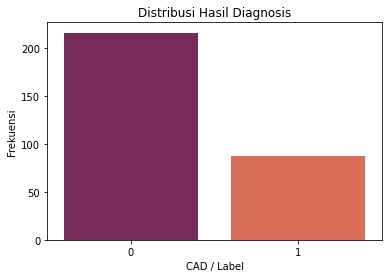

In [92]:
# menampilkan visualisasi dari hasil diagnosis berupa angka

plt.figure(figsize=(6, 4)) #ukuran visualisasi
sns.countplot(data=df, x='CAD', palette='rocket') #menggunakan model visualisasi rocket

plt.title('Distribusi Hasil Diagnosis') #judul visualisasi
plt.xlabel('CAD / Label')
plt.ylabel('Frekuensi')
plt.show()

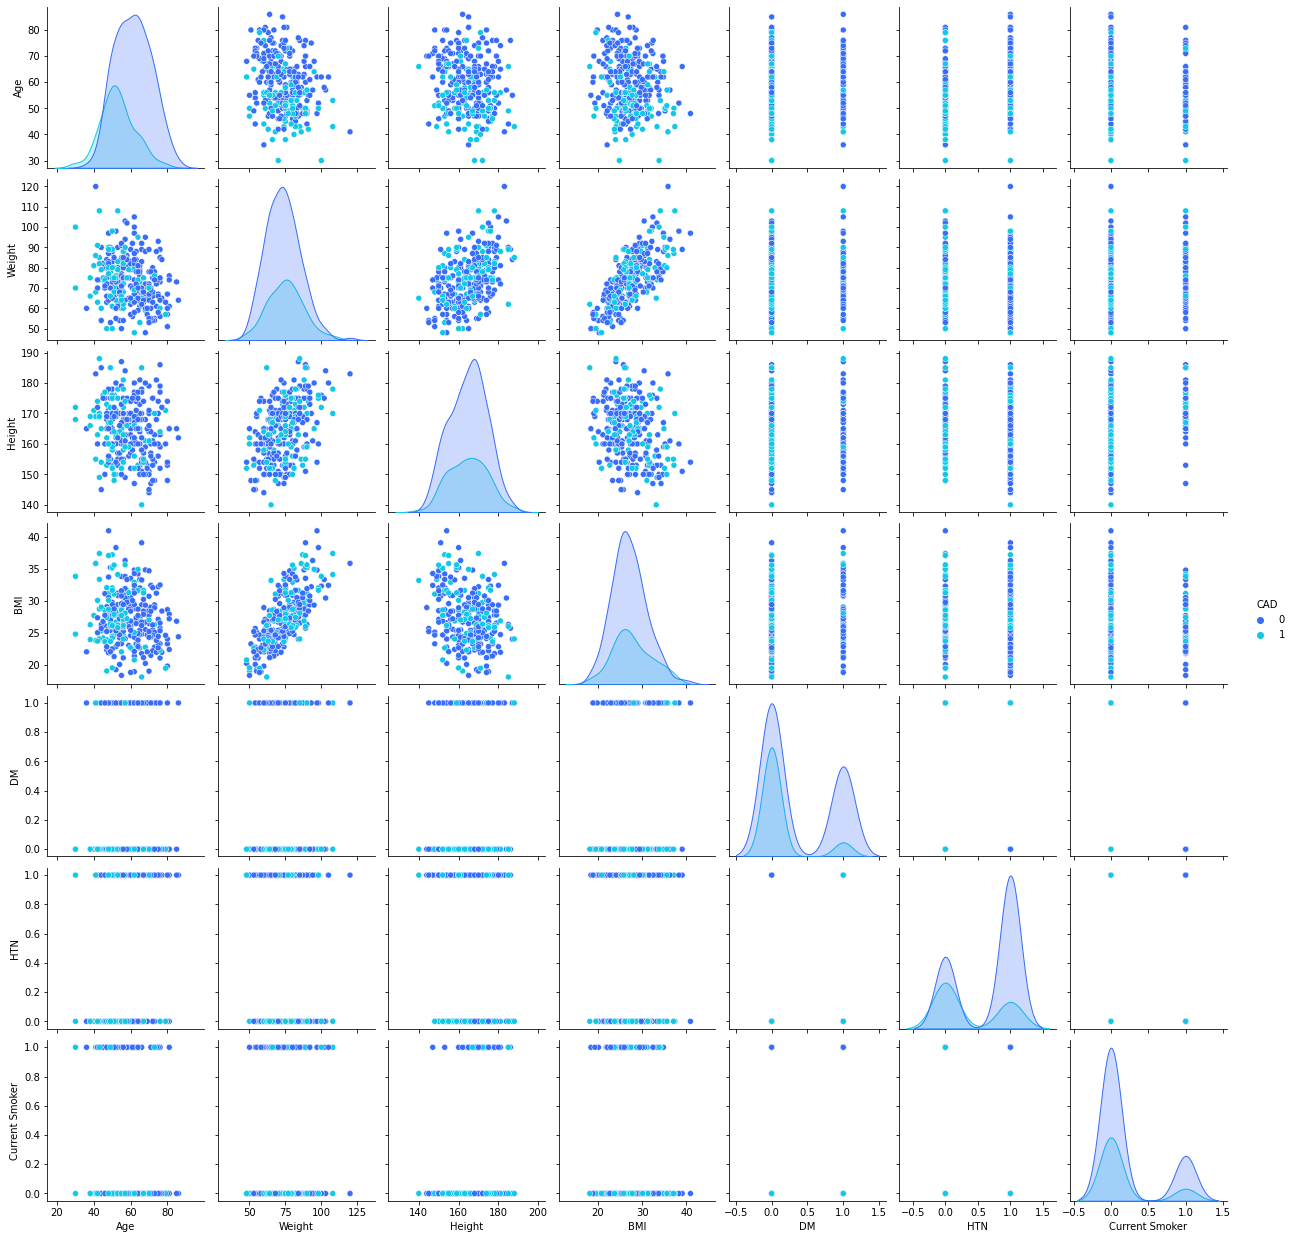

In [91]:
#menampilkan perbandingan visualisasi dari beberapa kolom

sns.pairplot(df,vars=['Age','Weight', 'Height', 'BMI', 'DM', 'HTN', 'Current Smoker'],hue = 'CAD')

# 4. Preparation Data

In [174]:
# mengubah tipe data ke tipe int, agar dapat dikerjakan

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['CAD'] = label_encoder.fit_transform(df['CAD'])
df['Obesity'] = label_encoder.fit_transform(df['Obesity'])
df['DLP'] = label_encoder.fit_transform(df['DLP'])
df['LVH'] = label_encoder.fit_transform(df['LVH'])
df['PRP'] = label_encoder.fit_transform(df['PRP'])
df['Atypical'] = label_encoder.fit_transform(df['Atypical'])
df['WPE'] = label_encoder.fit_transform(df['WPE'])
df['BMI'] = label_encoder.fit_transform(df['BMI'])

In [177]:
df.head() #menampilkan data terbaru 5 teratas

,Age,Weight,Height,Sex,BMI,DM,HTN,Current Smoker,Obesity,DLP,...,LVH,PRP,FBS,ESR,EF,RWMA,EX-Smoker,CR,BUN,CAD
0,53,90,175,1,186,0,1,1,1,1,...,0,0,90,7,50,0,0,0.7,8,0
1,67,70,157,0,161,0,1,0,1,0,...,0,0,80,26,40,4,0,1.0,30,0
2,54,54,164,1,10,0,0,1,0,0,...,0,0,85,10,40,2,0,1.0,17,0
3,66,67,158,0,129,0,1,0,1,0,...,0,0,78,76,55,0,0,1.2,30,1
4,50,87,153,0,257,0,1,0,1,0,...,0,0,104,27,50,0,0,1.0,16,1


In [187]:
#melakukan spliting data

X = df.drop(columns=['CAD']) #menghapus kolom CAD, karena label ini untuk training model nantinya
y = df['CAD'] #mengambil kolom CAD

print("X : ", X.shape) #menampilkan jumlah baris data
print("y : ", y.shape) #menampilkan jumlah baris data

X :  (303, 26)
y :  (303,)


In [196]:
#melakukan standarisasi

scaler = StandardScaler() #membuat variabel
scaler.fit(X)
X = scaler.transform(X) #membuat variabel X

In [197]:
#spliting untuk memisahkan data training dan data testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #maksud dari 0.2 adalah pembagian untuk 20% data testing dan sisanya 80% data training

# 5. Modeling dan Evaluation

In [198]:
clf = SVC(kernel = 'linear') #membuat variabel clf untuk model svm, dan menggunakan parameter kernel
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test) #membuat variabel y_pred, untuk memprediksi x_test 
CLF_acc = accuracy_score(y_pred, y_test) #untuk menampilkan nilai akurasi dari model svm yang sudah dibangun

print(classification_report(y_test, y_pred)) #menampilkan classification report yang didalamnya ada y_test dan y_pred 
print("Akurasi SVM : {:.2f}%".format(CLF_acc*100)) #menampilkan akurasi svm dalam bentuk persen

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.82      0.78      0.80        18

    accuracy                           0.89        61
   macro avg       0.87      0.85      0.86        61
weighted avg       0.88      0.89      0.88        61

Akurasi SVM : 88.52%


# 6. Testing

In [199]:
#membuat data baru menggunakan dictionary untuk melakukan testing

new_data = { ''   : [0],
            'Age' : [54], 
            'Weight' : [60], 
            'Height' : [154], 
            'BMI': [170], 
            'DM' : [0], 
            'HTN' : [1], 
            'Current Smoker' : [1],
           'Obesity' : [1], 
           'DLP' : [1],
           'BP' : [100],
           'WPE' : [1],
           'Typical Chest Pain' : [0],
           'Atypical' : [1],
           'Nonanginal' : [0],
           'St Depresion' : [1],
           'Tinversion' : [0],
           'LVH' : [1],
           'PRP' : [1],
           'FBS' : [70],
           'ESR' : [4],
           'EF' : [50],
           'RWMA' : [0],
           'EX-Smoker' : [1],
           'CR' : [1],
           'BUN' : [30]}

#yang tidak disertakan hanya atribut CAD , karenan nanti atribut CAD tersebut yang akan kita tentukan

new_data = pd.DataFrame(new_data) #mengubah variabel new_data ke bentu Dataframe
new_data
    

,,Age,Weight,Height,BMI,DM,HTN,Current Smoker,Obesity,DLP,...,Tinversion,LVH,PRP,FBS,ESR,EF,RWMA,EX-Smoker,CR,BUN
0,0,54,60,154,170,0,1,1,1,1,...,0,1,1,70,4,50,0,1,1,30


In [200]:
#melakukan testing dari data yang kita sudah bentuk

scaled_new_data = scaler.transform(new_data) #membuat variabel scaled_new_data untuk melakukan transform terhadap data baru yang kita punya
y_pred_new = clf.predict(scaled_new_data) #melakukan prediksi data terhadap variabel scaled_new_data yang dibuat barusan

print("Diagnosis Data Baru : ", y_pred_new) #menampilkan hasil diagnosis  

Diagnosis Data Baru :  [0]
